# （一）首先导入基本的包和自定义函数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import import_ipynb        # 这个包可以使用我定义的函数。
# import my_function as mf   #  这里面有我自己定义的函数。

### （1）标准化函数

In [2]:
#1.标准化的函数。
def z_score(data,a): # 这里data表示的是那个二维数组或矩阵，a表示的是对行还是对列。
    [n,m] = data.shape
    mean_data1 = np.mean(data,axis=a).T  # 弄出来的时候是行向量。这里要特别注意的就是行向量和列向量之间的差距。
    std_data = np.std(data,axis=a).T  # 这里转置一下。
    # print(mean_data1[0,1])
    for i in range(m):
        data[:,i] = (data[:,i] - mean_data1[i,0])*(1/std_data[i,0])
    return data # 返回data，data就是标准化后的矩阵。

### (2)创造代价函数的函数

In [3]:
def cost_fuction(theta,lamda,x,y):  # 这里表示的是将theta,lamda,x,y矩阵全部传进来，然后可以进行运算了。
    [n,m] = x.shape                # 查看数据的大小，为后续做准备。
    a = 1/(2*m)                    # 首先将前面的1/(2m)定义出来 要注意括号的问题。
    b = np.dot(x,theta) - y        #将代价函数与真实值作差。
    t = np.array(theta)           #转化为矩阵的形式
    c = lamda / (2 * m) * sum(t **2)  # 加入惩罚项。
    return np.squeeze(a * np.dot(b.T,b) + c)   # 这里用矩阵的形式来表达平方项并消除维度的影响。

### (3)对代价函数进行求导或者偏导的函数

In [4]:
def der_function(theta,lamda,x,y):  # 对于线性函数 这个求导还是很好搞出来的。和上面是一样的参数传入。
    [n,m] = x.shape   # 首先还是要查看一下矩阵x的大小
    a = 1/m # 首先还是先定义1/m.
    b = np.dot(x,theta) - y # 这里表示的是求和。
    c = lamda * theta   # 这里是创造惩罚项
    return a*(np.dot(x.T,b)+ c)# 最后返回的是一个求偏导的矩阵，全部都乘了1/m。
    

### （4）最重要的迭代函数

In [5]:
# 这个函数的参数依次是学习率，迭代次数，系数，自变量矩阵以及因变量。
def iterate_function(alpha,lamda,cnt,theta,x,y):   # 这里是迭代的函数，也是最重要的函数。
    y_data = [] # 创造一个空列表 用于储存数据。
    
    for i in range(cnt):  # 这里书写一个循环来表示迭代多少次。
        theta = theta - alpha*der_function(theta,lamda,x,y) # 这里是函数里面继续调用函数
        j_data = cost_fuction(theta,lamda,x,y)  # 这里将代价函数的值返回
        y_data.append(j_data)    # 将每次代价函数的值储存起来。
        
    return theta,y_data   # 将theta和用于数据可视化的值返回。
        
            
    
    

### (五)数据可视化的函数。

In [6]:
def myplot(cnt,y):  # 这里传入的数字是指迭代多少次以及将迭代好的代价函数的值传入，便于画出图像。
    x = [x for x in range(len(y))]  # 这里首先创造一个迭代次数的列表。
    plt.plot(x,y,'b-')
    
    

# （二）正规矩阵法

## 1.导入数据

In [7]:
train_data = pd.read_csv('./task/train_.csv')# 这里可以看到是相对路径，不是绝对路径。 

# print(train_data)

[n,m] = train_data.shape # 矩阵的大小导入到n和m的变量里面去，

print('矩阵的大小是：' + str(train_data.shape)) #这里来看一下矩阵的大小。

矩阵的大小是：(404, 15)


## 2.接下来是缺失值的处理。

### （1）查看缺失值

In [8]:
print(train_data) # 可以看到数据存在一定的缺失值

      id        0     1      2    3       4      5      6       7     8  \
0      0  1.23247   0.0   8.14  0.0  0.5380  6.142   91.7  3.9769   4.0   
1      1  0.02177  82.5   2.03  0.0  0.4150  7.610   15.7  6.2700   2.0   
2      2  4.89822   0.0  18.10  0.0  0.6310  4.970  100.0  1.3325  24.0   
3      3  0.03961   0.0   5.19  0.0  0.5150  6.037   34.5  5.9853   5.0   
4      4  3.69311   0.0  18.10  0.0  0.7130  6.376   88.4  2.5671  24.0   
..   ...      ...   ...    ...  ...     ...    ...    ...     ...   ...   
399  399  0.21977   0.0   6.91  0.0  0.4480    NaN   62.0  6.0877   3.0   
400  400  0.16211  20.0   6.96  0.0  0.4640  6.240   16.3     NaN   3.0   
401  401  0.03466  35.0   6.06  0.0  0.4379  6.031   23.3  6.6407   1.0   
402  402  2.14918   0.0  19.58  0.0  0.8710  5.709   98.5  1.6232   5.0   
403  403  0.01439  60.0   2.93  0.0  0.4010  6.604   18.8  6.2196   NaN   

         9    10      11     12  outcome  
0    307.0  21.0  396.90  18.72     15.2  
1    348.0  1

### （2）采用每个标签的平均值作为每个标签缺失值的替代

In [9]:
# 求解每一列的平均值。
tr_data = train_data.iloc[:,1:m] # 切片 ，将数据复制一份。

mean_data = tr_data.mean(axis=0) # 求解每一行的平均值，自动忽略缺失值。0表示列操作，1表示行操作。

print(tr_data)

print(mean_data)

           0     1      2    3       4      5      6       7     8      9  \
0    1.23247   0.0   8.14  0.0  0.5380  6.142   91.7  3.9769   4.0  307.0   
1    0.02177  82.5   2.03  0.0  0.4150  7.610   15.7  6.2700   2.0  348.0   
2    4.89822   0.0  18.10  0.0  0.6310  4.970  100.0  1.3325  24.0  666.0   
3    0.03961   0.0   5.19  0.0  0.5150  6.037   34.5  5.9853   5.0  224.0   
4    3.69311   0.0  18.10  0.0  0.7130  6.376   88.4  2.5671  24.0  666.0   
..       ...   ...    ...  ...     ...    ...    ...     ...   ...    ...   
399  0.21977   0.0   6.91  0.0  0.4480    NaN   62.0  6.0877   3.0  233.0   
400  0.16211  20.0   6.96  0.0  0.4640  6.240   16.3     NaN   3.0  223.0   
401  0.03466  35.0   6.06  0.0  0.4379  6.031   23.3  6.6407   1.0  304.0   
402  2.14918   0.0  19.58  0.0  0.8710  5.709   98.5  1.6232   5.0    NaN   
403  0.01439  60.0   2.93  0.0  0.4010  6.604   18.8  6.2196   NaN  265.0   

       10      11     12  outcome  
0    21.0  396.90  18.72     15.2  
1  

In [10]:
# 将每一列的缺失值进行填补。
# 首先确定数据的大小。

[n1,m1] = tr_data.shape
print('tr_data的大小是' + str(tr_data.shape))

tr_data的大小是(404, 14)


In [11]:
for i in range(m1):
    tr_data.iloc[:, i:i+1] = tr_data.iloc[: , i:i + 1].fillna(mean_data.iloc[i])
    # 这里要特别注意的是，确实值处理的那一列数据要赋值，同时做出切片操作的时候要多切一位，保证数据还是数据框结构。
print(tr_data) # 查看数据。

tr_data.to_csv('./处理缺失值后的数据.csv') # 将数据导出。

           0     1      2    3       4         5      6         7          8  \
0    1.23247   0.0   8.14  0.0  0.5380  6.142000   91.7  3.976900   4.000000   
1    0.02177  82.5   2.03  0.0  0.4150  7.610000   15.7  6.270000   2.000000   
2    4.89822   0.0  18.10  0.0  0.6310  4.970000  100.0  1.332500  24.000000   
3    0.03961   0.0   5.19  0.0  0.5150  6.037000   34.5  5.985300   5.000000   
4    3.69311   0.0  18.10  0.0  0.7130  6.376000   88.4  2.567100  24.000000   
..       ...   ...    ...  ...     ...       ...    ...       ...        ...   
399  0.21977   0.0   6.91  0.0  0.4480  6.270394   62.0  6.087700   3.000000   
400  0.16211  20.0   6.96  0.0  0.4640  6.240000   16.3  3.740628   3.000000   
401  0.03466  35.0   6.06  0.0  0.4379  6.031000   23.3  6.640700   1.000000   
402  2.14918   0.0  19.58  0.0  0.8710  5.709000   98.5  1.623200   5.000000   
403  0.01439  60.0   2.93  0.0  0.4010  6.604000   18.8  6.219600   9.536524   

              9         10      11     

## 3.接下来是提取因变量和自变量。

### （1）提取多个自变量并转化为矩阵的形式。

In [12]:
# 这里将数据全部转化为矩阵的形式。
x = np.mat(tr_data.iloc[: , 0 : m1-1])
y = np.mat(tr_data.iloc[: , m1-1 : m1])
one_data = np.ones([n1 ,1])
# print(z_data)
x = np.hstack((x, one_data)) # 这里将1矩阵放在最前面，那么最后的beta系数第一个就是截距项。
#print(x.shape)

### （2）使用正规矩阵法进行求解。

In [13]:
# 这里将数据全部取出以后，使用矩阵的运算来进行ols多元线性回归。
#np. linalg.inv (a)
X = np.linalg.inv(np.dot(x.T, x)) # 先将x和x相乘的逆矩阵储存起来。
X1 = np.dot(X, x.T) # 这里进行下一步的操作。
beta = np.dot(X1, y)
beta1 = pd.DataFrame(beta) #转化为数据框。
print('系数如下（最后的为截距项，剩余的按照顺序为标签前面的系数）：')
print(beta1)
beta1.to_csv('./截距项与各个自变量的偏导.csv') # 导出文件。

系数如下（最后的为截距项，剩余的按照顺序为标签前面的系数）：
            0
0   -0.119155
1    0.054632
2   -0.006677
3    4.318077
4  -17.033390
5    3.690711
6    0.003981
7   -1.593332
8    0.303574
9   -0.011363
10  -0.718690
11   0.008059
12  -0.550123
13  33.249273


## 4.测试验证集

In [14]:
# 首先还是到输入数据。
# 这里数据预处理和上面一致，这里就不过多的赘述。
test_data = pd.read_csv('./task/test_.csv')
# print(test_data)

[n2, m2] = test_data.shape
test_x = test_data.iloc[:, 1:m2] # 这里是切片。
#print(test_x)

[n2, m2] = test_x.shape # 这里将n2,m2重置了。
mean_data1 = test_x.mean(axis=0)
print('每一列的平均值是：\n'+str(mean_data1))

for i in range(m2):
    test_x.iloc[:, i:i+1] = test_x.iloc[: , i:i + 1].fillna(mean_data1.iloc[i])
#print(test_x)
test_x = np.mat(test_x.iloc[:]) # 全部的切片 在这里先转化
one_data1 = np.ones([n2,1]) # 创造1矩阵。
test_x = np.hstack((test_x, one_data1)) # 这里是二维的，所以要两个括号。
test_y = np.dot(test_x,beta) # 这里将矩阵相乘即可得到对于的因变量。
test_y = pd.DataFrame(test_y)
print(test_y)
test_y.to_csv('./test_finish.csv')

每一列的平均值是：
0       3.122804
1      10.901961
2      11.264902
3       0.098039
4       0.544156
5       6.354157
6      66.849020
7       4.011982
8       9.980392
9     417.500000
10     18.374510
11    364.163333
12     12.299901
dtype: float64
             0
0    10.067569
1    20.679003
2    21.333479
3    33.629246
4    25.758296
..         ...
97   39.649679
98   25.120889
99   41.304650
100  34.544072
101  24.626468

[102 rows x 1 columns]


PermissionError: [Errno 13] Permission denied: './test_finish.csv'

In [ ]:
### 4.2数据可视化，查看是否达到收敛。

# (三)这里是使用梯度下降法来求解。

In [15]:
print(tr_data)# 这个是从上面处理完缺失值的数据。

           0     1      2    3       4         5      6         7          8  \
0    1.23247   0.0   8.14  0.0  0.5380  6.142000   91.7  3.976900   4.000000   
1    0.02177  82.5   2.03  0.0  0.4150  7.610000   15.7  6.270000   2.000000   
2    4.89822   0.0  18.10  0.0  0.6310  4.970000  100.0  1.332500  24.000000   
3    0.03961   0.0   5.19  0.0  0.5150  6.037000   34.5  5.985300   5.000000   
4    3.69311   0.0  18.10  0.0  0.7130  6.376000   88.4  2.567100  24.000000   
..       ...   ...    ...  ...     ...       ...    ...       ...        ...   
399  0.21977   0.0   6.91  0.0  0.4480  6.270394   62.0  6.087700   3.000000   
400  0.16211  20.0   6.96  0.0  0.4640  6.240000   16.3  3.740628   3.000000   
401  0.03466  35.0   6.06  0.0  0.4379  6.031000   23.3  6.640700   1.000000   
402  2.14918   0.0  19.58  0.0  0.8710  5.709000   98.5  1.623200   5.000000   
403  0.01439  60.0   2.93  0.0  0.4010  6.604000   18.8  6.219600   9.536524   

              9         10      11     

## 1.数据的预处理（排除量纲的影响）

### （1）Z标准化。

#### Z标准化的公式为：$$Z_{ij}=\frac{x_{ij}-\mu}{\sigma}$$ 

#### 其中$\mu$表示的是这一列数据的平均值，$\sigma$表示的是这一列数据的标准差。

In [16]:
z_data_x = np.mat(tr_data.iloc[:,0:m1-1])
z_data_y = np.mat(tr_data.iloc[:,m1-1:m1]) # 转化为矩阵。
print(z_data_x.shape)

(404, 13)


In [24]:
z_x1 = z_score(z_data_x,0) # 调用自定义函数。
z_x1 = pd.DataFrame(z_x1)
print(z_x) # 最终获得z_x就是标准化后的数据并转化为数据框。
z_x1.to_csv('./标准化后的数据(自变量）.csv')  # 这里引入中间变量来进行数据的存储非常重要，不然可能会出现一些致命的错误。

[[-0.27419786 -0.48702666 -0.44244085 ...  0.44842312  0.82651848
   1.        ]
 [-0.4054235   2.99173519 -1.34667337 ...  0.43221815 -1.34129266
   1.        ]
 [ 0.12312633 -0.48702666  1.03156175 ...  0.22048746 -1.32046167
   1.        ]
 ...
 [-0.40402638  0.9888117  -0.75026468 ...  0.07901384 -0.68581101
   1.        ]
 [-0.17483727 -0.48702666  1.25059025 ... -0.99030077  0.41961991
   1.        ]
 [-0.40622341  2.04298196 -1.21348036 ...  0.23306764 -1.16492365
   1.        ]]


## （2）接下来就是进行梯度下降的代码

In [25]:
# 这里要特别注意的就是，现在z_x已经是数据框了，要先转化成矩阵的形式。
z_x = np.mat(z_x1)
z_x = np.hstack((z_x1,one_data))  # 这里是引入截距项。
#print(z_x)
[n4,m4] = z_x.shape
# print(n4)
# print(m4)
theta = np.zeros([m4,1]) #创造一个列向量并初始化为0，为后续迭代做准备。
alpha = 0.001               # 在这里定义学习速率，学习速率是加快迭代速度的，但是也不能太大。
lamda = 50            # 在这里定义lamda也就是正则化，惩罚项。

In [26]:
# 接下来就是求解最终的系数
# def iterate_function(alpha,cnt,theta,x,y)
cnt = 1500 # 这里选择的是迭代次数
finish,j_data = iterate_function(alpha,lamda,cnt,theta,z_x,z_data_y) # 返回的是系数以及代价函数随迭代次数的变化。
data = pd.DataFrame(finish)
print(data)
data.to_csv('./梯度下降法求得的系数.csv')

            0
0   -0.856561
1    0.857022
2   -0.378332
3    1.000557
4   -1.168663
5    2.745223
6   -0.051124
7   -2.131495
8    1.094638
9   -0.688990
10  -1.409704
11   0.739098
12  -3.334588
13  19.985623


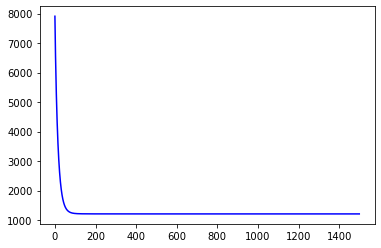

In [27]:
# 这里是数据可视化。
j_data = np.squeeze(j_data)  # 数据将维度
myplot(cnt,j_data)  

#### 这里可以看到数据在大概100多次的迭代过程中趋于稳定。

In [28]:
# 最后就是将验证集的数据代入然后进行求解。
print(test_x.shape) # 这里回顾一下前面验证正规矩阵法的时候的数据集。
print(finish)
[n6,m6] = test_x.shape

(102, 14)
[[-0.85656119]
 [ 0.85702197]
 [-0.37833216]
 [ 1.00055674]
 [-1.16866256]
 [ 2.74522307]
 [-0.05112395]
 [-2.13149534]
 [ 1.09463794]
 [-0.68898978]
 [-1.40970361]
 [ 0.73909792]
 [-3.33458799]
 [19.98562275]]


In [29]:
z_test = z_score(test_x[:,0:m6-1],0)  # 将数据进行标准化。、
z_test = np.hstack((z_test,one_data1)) # 在数据后面加上1.
data = np.dot(z_test,finish)
data = pd.DataFrame(data)  # 转化为数据框。
print(data)
data.to_csv('./test_finish2.csv')

             0
0     5.208211
1    17.552981
2    18.596348
3    28.472490
4    22.313787
..         ...
97   35.058803
98   22.603490
99   36.790490
100  29.562180
101  20.710171

[102 rows x 1 columns]
